# Wind Power Generation Forcasting


In [1]:
pip install  pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


pandas is use for data manipulation
numpy is use for linear algebra calculation like matrix,vector and so on
matplotlib.pyplot is use for visulization which means for graph and so on
seaborn is advance lib based on matplotlib.pyplot
sklearn.model is use for ML
sklearn.preprocessing is use for making standard scale for different values like kg,meter,liter and so on



In [2]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# load the dataset which is in csv format
location1=pd.read_csv('Location1.csv')
location2=pd.read_csv('Location2.csv')
location3=pd.read_csv('Location3.csv')
location4=pd.read_csv('Location4.csv')

In [4]:
#see the dataset which we have loaded
# head() without any arguments will display first 5 rows od dataset
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [5]:
# to add a new column to identify the location of the dataset
location1['Location']='location1'
location2['Location']='location2'
location3['Location']='location3'
location4['Location']='location4'

# now we will concatenate all the datasets into a single dataset
merged_dataset=pd.concat([location1, location2, location3, location4], ignore_index=True)

In [6]:
merged_dataset.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,location1


In [7]:
merged_dataset.tail()   

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,location4
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,location4
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,location4
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,location4
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,location4


In [8]:
# save the merged dataset to a new csv file
merged_dataset.to_csv('merged_dataset.csv', index=False)

In [9]:
# to see the basic information about the dataset
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [10]:
# to see the statistical information about the dataset
merged_dataset.describe()
# to make it more readable we will transpose the dataset
merged_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [11]:
# to see the number of null values in the dataset
merged_dataset.isnull()
# to see the sum of null values in the dataset
merged_dataset.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [12]:
# to see the duplicate values in the dataset
merged_dataset.duplicated()
# to see the sum of duplicate values in the dataset
merged_dataset.duplicated().sum()

np.int64(0)

In [13]:
# to cenvert the object values to numeric values we will use get_dummies()
merged_dataset=pd.get_dummies(merged_dataset, columns=['Location'], drop_first=True)

In [14]:
merged_dataset.head()
merged_dataset.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_location2,Location_location3,Location_location4
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,False,False,True
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,False,False,True
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,False,False,True
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,False,False,True
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,False,False,True


In [15]:
merged_dataset.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_location2',
       'Location_location3', 'Location_location4'],
      dtype='object')

In [16]:
# how to remove the unwanted columns from the dataset
#drop() is used to remove the unwanted columns from the dataset
# dropna() is used to remove the unwanted rows from the dataset

merged_dataset.drop(['Time'], axis=1, inplace=True)
# axis=1 is used to drop the column and axis=0 is used to drop the row

In [17]:
merged_dataset.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_location2,Location_location3,Location_location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


WEEK 2. EDA

In [19]:
#lets extract the numerical columns from the dataset
numerical_columns=merged_dataset.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

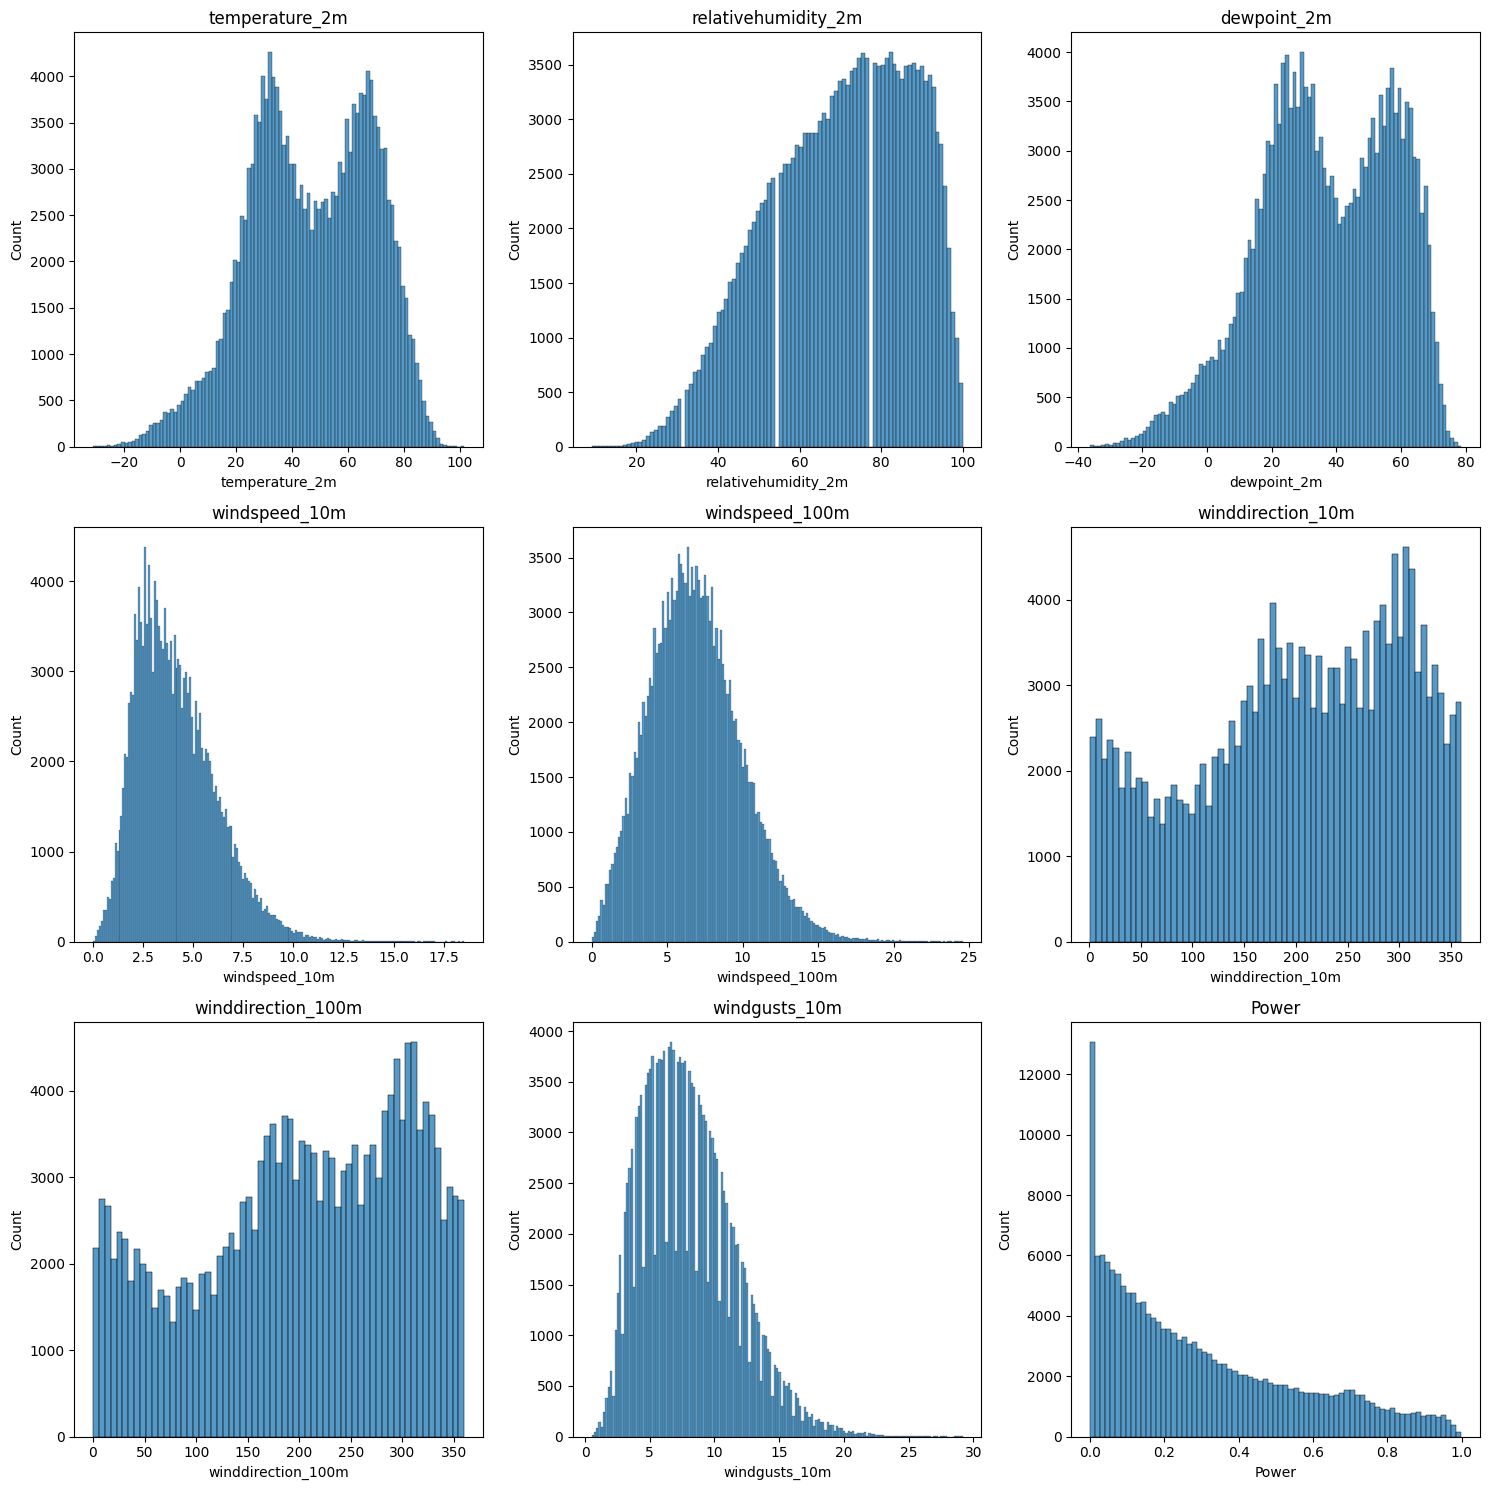

In [20]:
# let's plot the subplots for the data distribution of each numerical columns
fig, axes=plt.subplots(3, 3, figsize=(15,15))
axes=axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_dataset[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

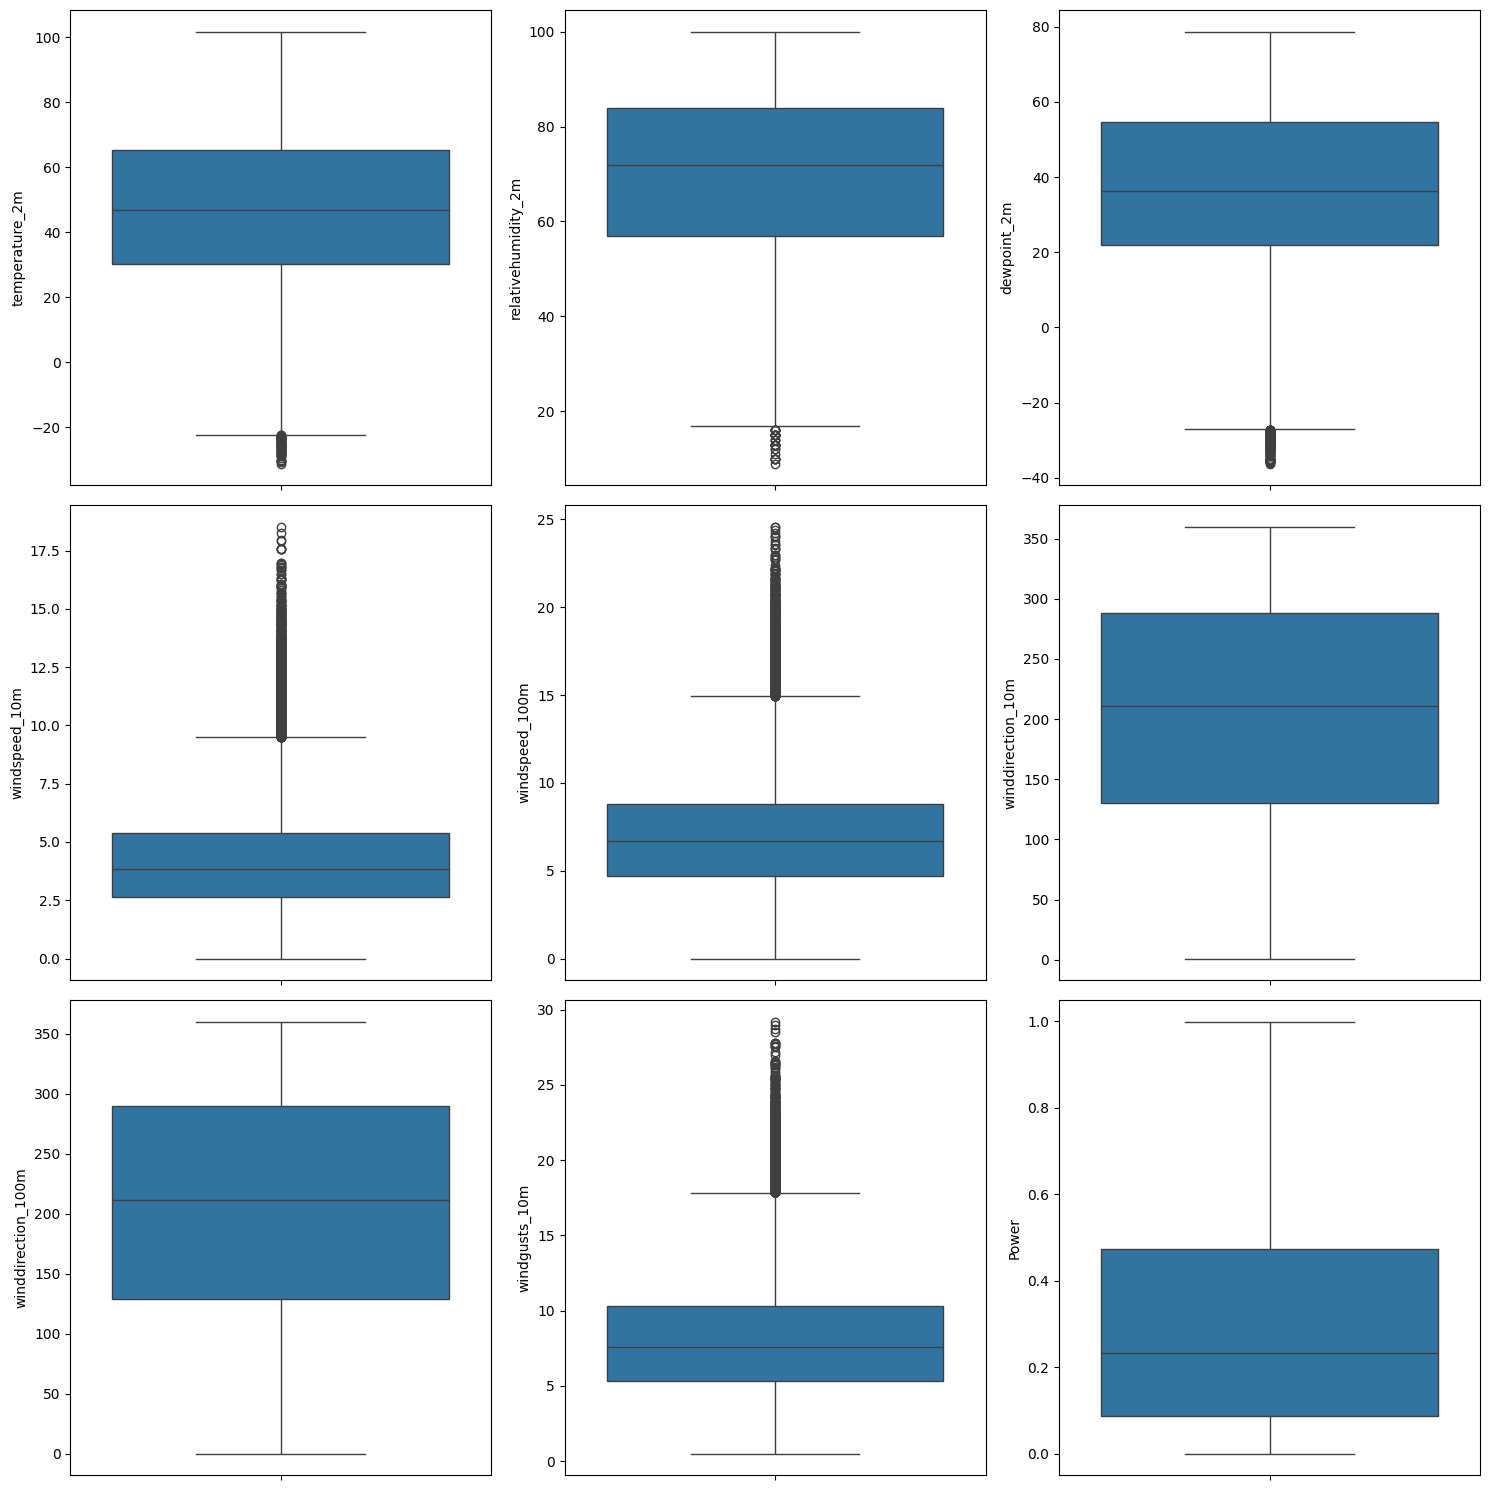

In [21]:
# let's create the box plot
fig, axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_dataset[col],ax=axes[i])
plt.tight_layout()
plt.show()    

In [22]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location_location2   175200 non-null  bool   
 10  Location_location3   175200 non-null  bool   
 11  Location_location4   175200 non-null  bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 12.5 MB


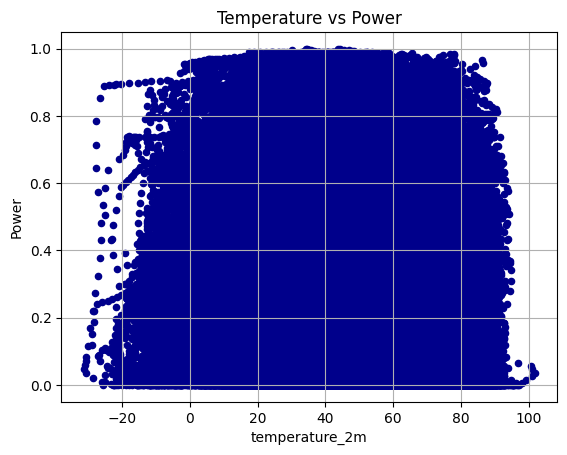

In [24]:
# let's use scatter plot to see the relationship beetwen temp and power
merged_dataset.plot.scatter(x='temperature_2m',y='Power',c='DarkBlue')
plt.xlabel='Temperature'
plt.ylabel='Power'
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


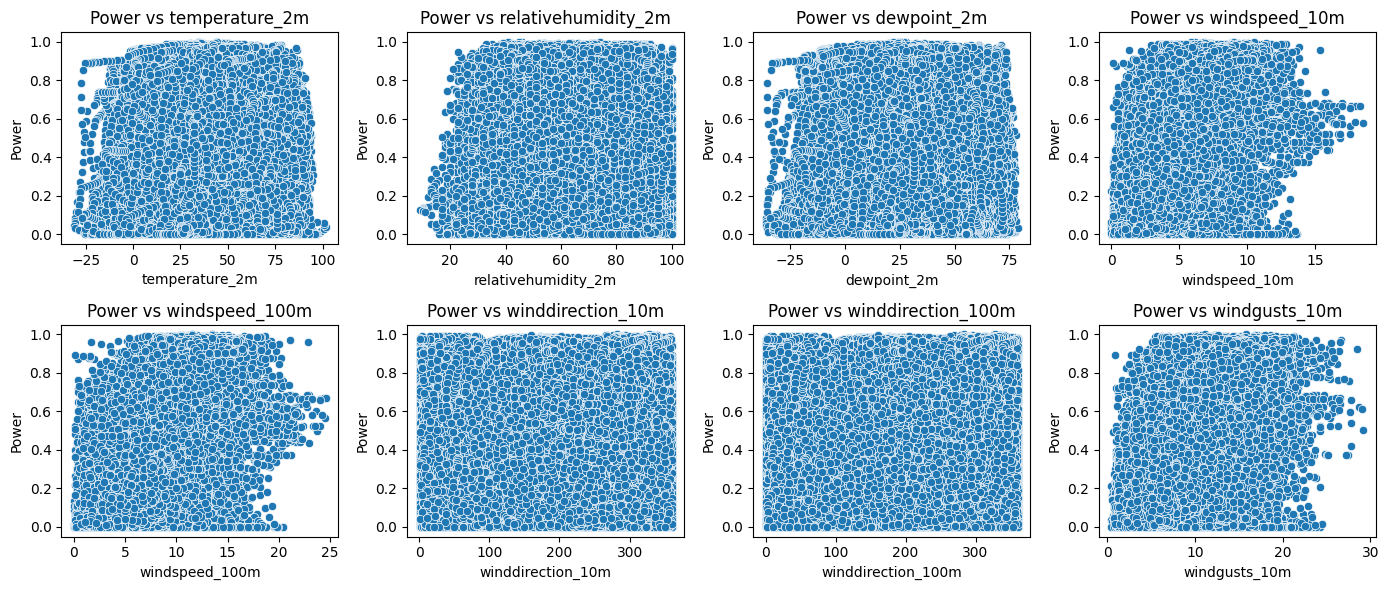

In [28]:
# creating multiple plot to see relation btw cols and power 
fig,axes=plt.subplots(2,4,figsize=(14,6))
axe=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col,y='Power',data=merged_dataset,ax=axe[i])
    axe[i].set_title(f'Power vs {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Power')
plt.tight_layout()
plt.show()    

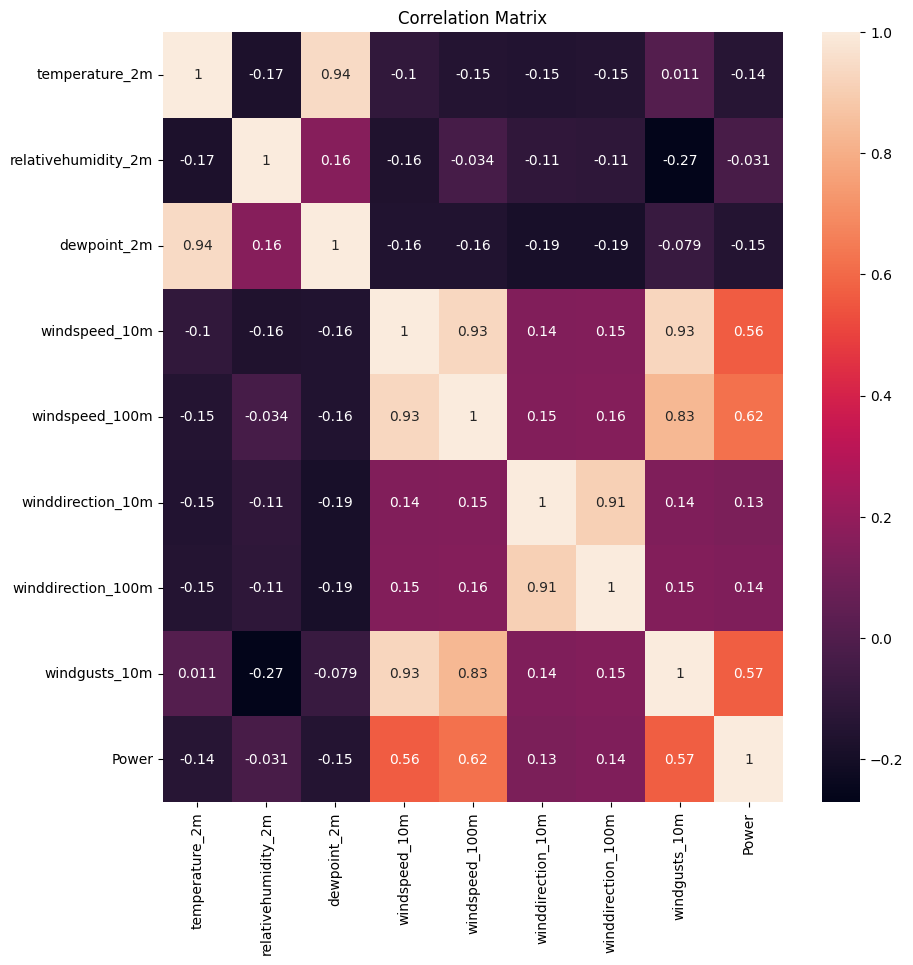

In [29]:
#check the correlation of the btw cols and power
correlation=merged_dataset[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()